# 时间序列


## 葛兰素史克营业额分析


2006-2020年年报


2018-2020年季报

# 程序执行


## 加载工具类utils

In [1]:
import pandas as pd
import untils

## 加载数据


GSK_benefit_report.xls


两个不同的sheet显示半年报以及季度报


# 数据


## 季报


2018~2020


In [2]:
untils.TimeSeries
pd.read_excel('GSK_benefit_report.xls', sheet_name='quarter')
quarter = untils.TimeSeries(pd.read_excel('GSK_benefit_report.xls', sheet_name='quarter'), '季报')
quarter.origin

,时间,营业总收入
0,2018-03-31,7222000000
1,2018-06-30,7310000000
2,2018-09-30,8092000000
3,2018-12-31,8197000000
4,2019-03-31,7661000000
5,2019-06-30,7809000000
6,2019-09-30,9385000000
7,2019-12-31,8899000000
8,2020-03-31,9090000000
9,2020-06-30,7624000000


## 年报


2006-2020

In [3]:
annum = untils.TimeSeries(pd.read_excel('GSK_benefit_report.xls', sheet_name='annum'), '年报')
annum.origin

,时间,营业总收入
0,2006-12-31,23225000000
1,2007-12-31,22716000000
2,2008-12-31,24352000000
3,2009-12-31,28368000000
4,2010-12-31,28392000000
5,2011-12-31,27387000000
6,2012-12-31,26431000000
7,2013-12-31,23006000000
8,2014-12-31,23006000000
9,2015-12-31,23923000000


## 时间序列图表


### 季报图表

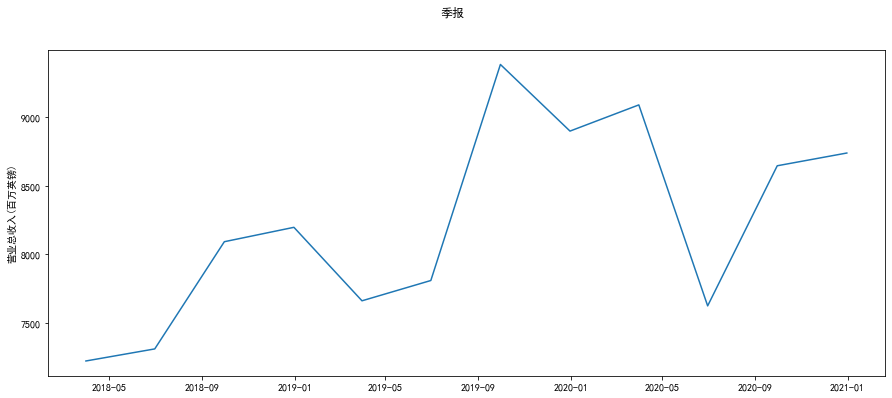

In [4]:
quarter.baseShow()

## 年报图表

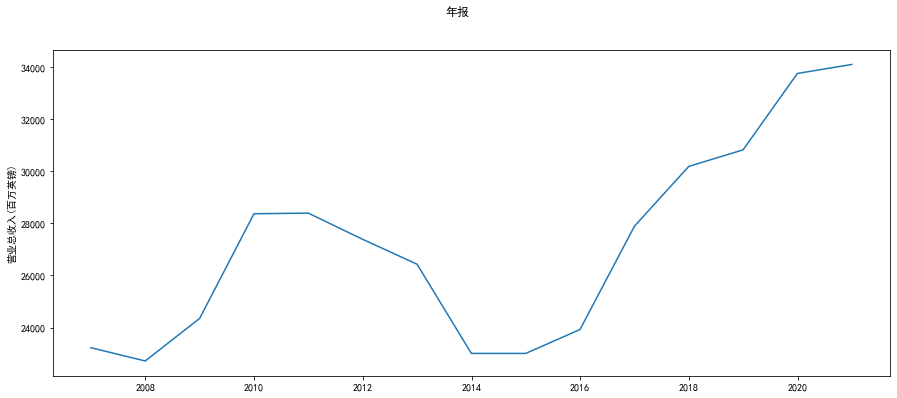

In [5]:
annum.baseShow()

季度统计数据内容比较多，半年统计数据时间跨度比较长，各有优缺点，分开分析

## 单位根检验（Dickey-Fuller test）


p-value较高，序列具有单位根，即非平稳。

# 自相关


绘制自相关图，判断序列是否自相关


## 季报自相关图

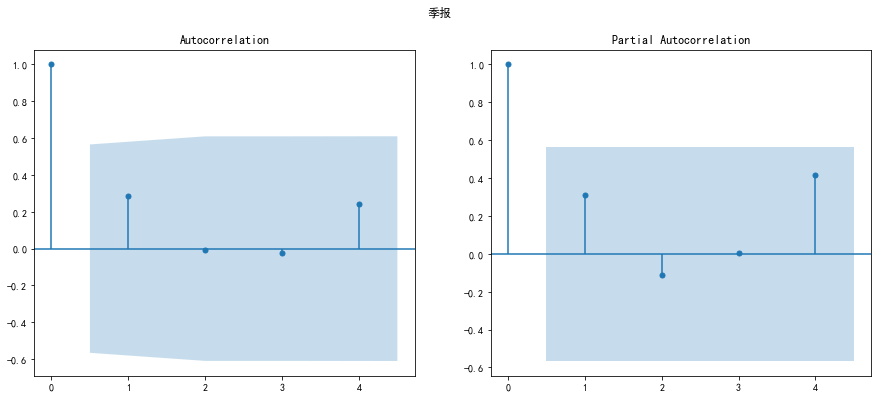

In [6]:
quarter.acfShow()

由自相关图可以看出，在2阶后落入区间内，并且自相关系数大于零或者几乎等于0，显示出很强的自相关性。


## 年报自相关图

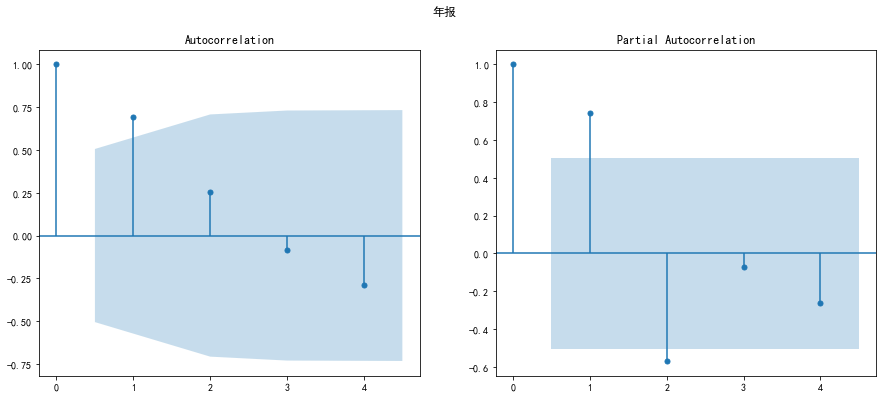

In [7]:
annum.acfShow()

由自相关图可以看出，在3阶后落入区间内，并且自相关系数分布均匀，显示出很强的自相关性。


# 平稳性检验


## 季报平稳性

In [8]:
quarter.dickey()

,value
Test Statistic Value,-0.928345
p-value,0.778495
Lags Used,3
Number of Observations Used,8
Critical Value(1%),-4.665186
Critical Value(5%),-3.367187
Critical Value(10%),-2.802961


如何确定该序列能否平稳呢？主要看：

1%、%5、%10不同程度拒绝原假设的统计值和ADF Test result的比较，ADF Test result同时小于1%、5%、10%即说明非常好地拒绝该假设，本数据中，adf结果（Test Statistic）为-0.928345， 大于三个level的统计值(-4.665186, -3.367187, -2.802961)。

看P-value是否非常接近0. 本数据中，P-value 为 0.778495,不够接近0。

ADF检验的原假设是存在单位根，只要这个统计值是小于1%水平下的数字就可以极显著的拒绝原假设，认为数据平稳。注意，ADF值一般是负的，也有正的，但是它只有小于1%水平下的才能认为是及其显著的拒绝原假设。

对于ADF结果在1% 以上 5%以下的结果，也不能说不平稳，关键看检验要求是什么样子的。

但是对于本例，，数据是显然不平稳的了。


## 年报平稳性

In [9]:
annum.dickey()

,value
Test Statistic Value,-1.567057
p-value,0.500117
Lags Used,1
Number of Observations Used,13
Critical Value(1%),-4.068854
Critical Value(5%),-3.127149
Critical Value(10%),-2.70173


# 时间序列的差分


## 季报做一阶差分


因为季报不平稳，所以要做一阶差分

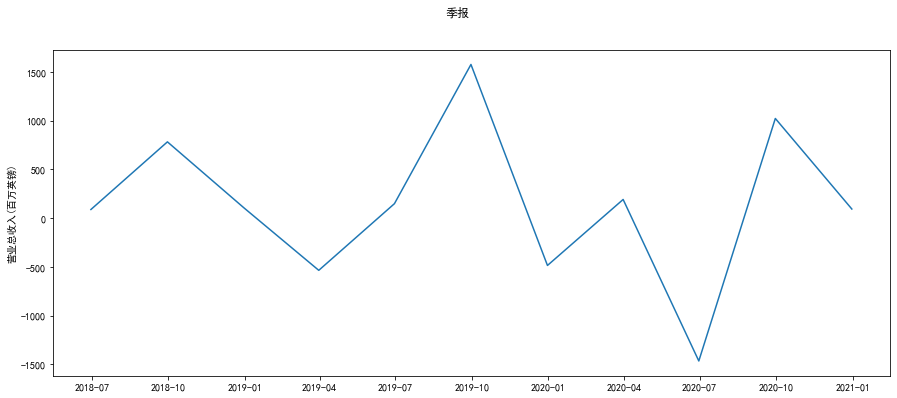

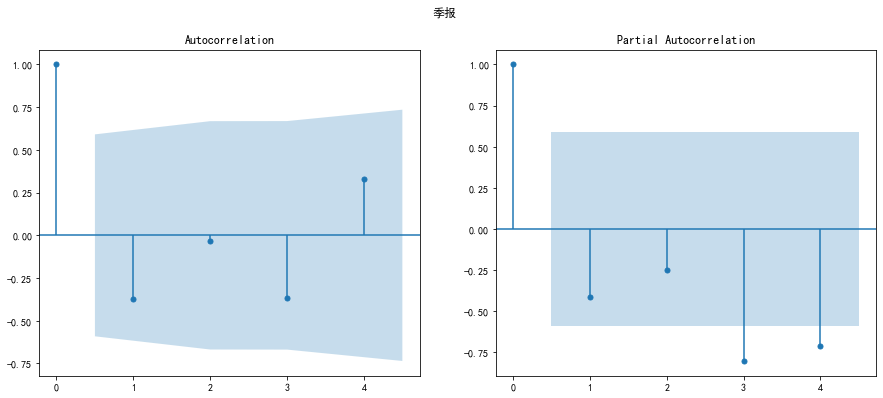

,value
Test Statistic Value,-3.582932
p-value,0.006096
Lags Used,2
Number of Observations Used,8
Critical Value(1%),-4.665186
Critical Value(5%),-3.367187
Critical Value(10%),-2.802961


In [10]:
quarter.diff()
quarter.baseShow(1)
quarter.acfShow(1)
quarter.dickey(1)

一阶差分之后，数据相对显著了


p-value小于0.02算比较平稳，小于0.002属于非常平稳




# 获取一下最佳p和q


## 季报order热力图

C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC wil

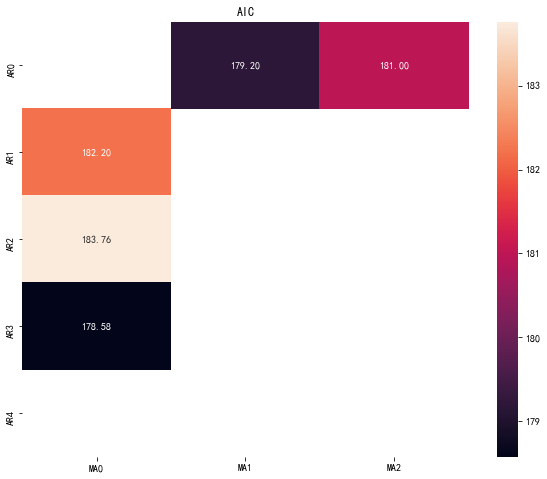

In [11]:
quarter.thermodynamicOrder(4,2, 1)

最佳order为p=3，q=0


## qq残差图

C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


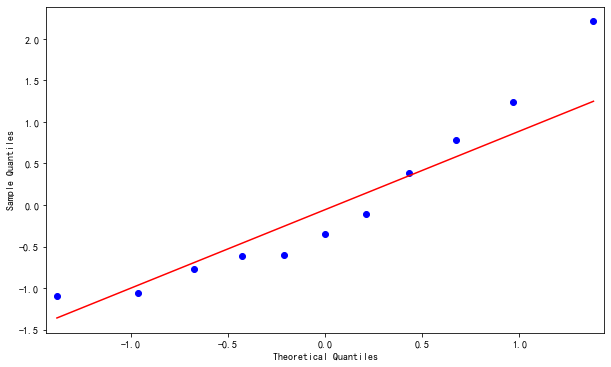

In [12]:
quarter.arma((3, 0), 1)
quarter.qqShow(1)

## 年报做一阶差分


因为年报不平稳，所以要做一阶差分

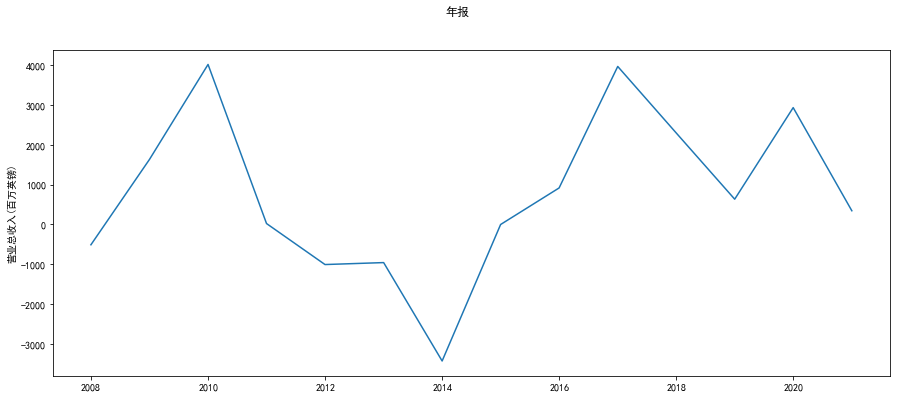

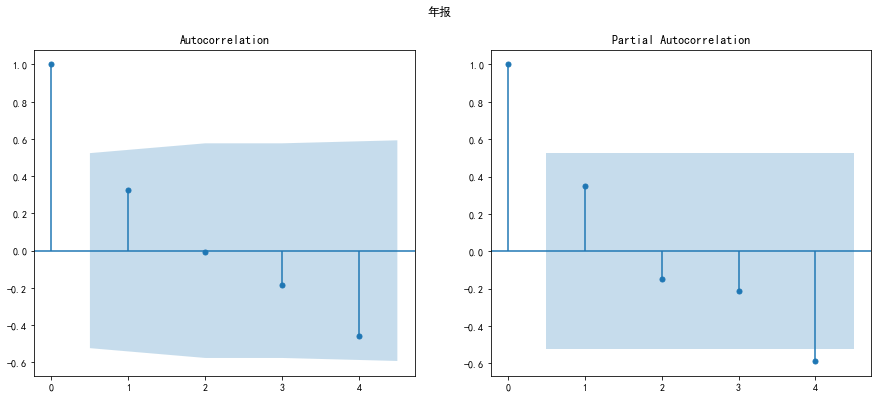

,value
Test Statistic Value,-2.405369
p-value,0.140227
Lags Used,0
Number of Observations Used,13
Critical Value(1%),-4.068854
Critical Value(5%),-3.127149
Critical Value(10%),-2.70173


In [13]:
annum.diff()
annum.baseShow(1)
annum.acfShow(1)
annum.dickey(1)

# 二阶差分


一阶差分还不够，继续做二阶差分

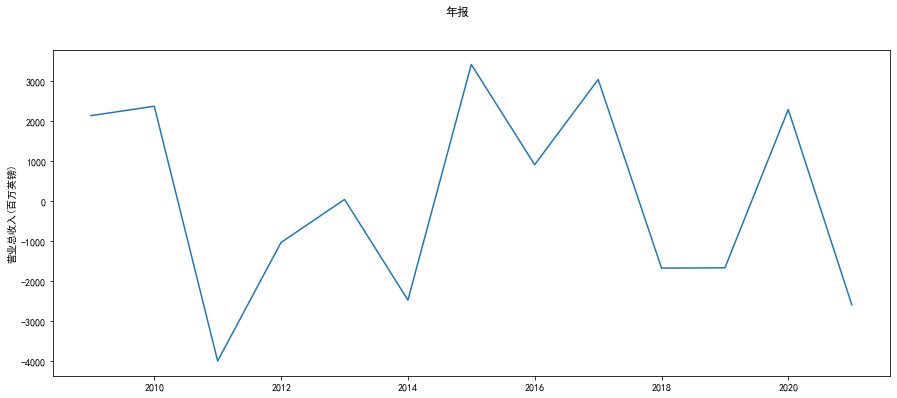

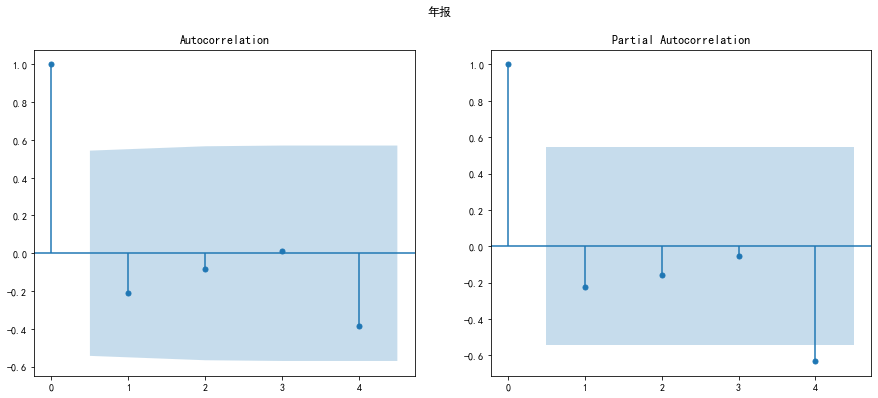

,value
Test Statistic Value,-3.887332
p-value,0.00213
Lags Used,0
Number of Observations Used,12
Critical Value(1%),-4.137829
Critical Value(5%),-3.154972
Critical Value(10%),-2.714477


In [14]:
annum.diff()
annum.baseShow(2)
annum.acfShow(2)
annum.dickey(2)

二阶差分终于平稳


## 年报order热力图

C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq,

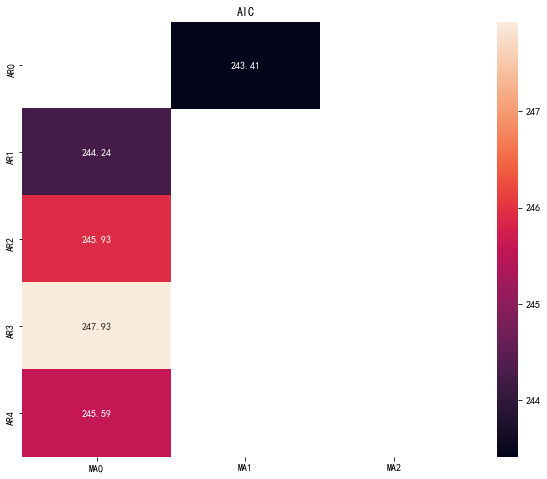

In [15]:
annum.thermodynamicOrder(4,2, 2)

通过热力图对比，p=0，q=1为最佳


## qq残差图

C:\Users\thales\.conda\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


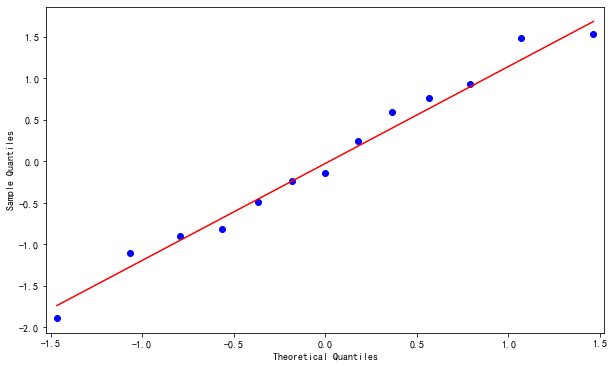

In [16]:
annum.arma((0,1), 2)
annum.qqShow(2)

# 模型预测


## 季报预测

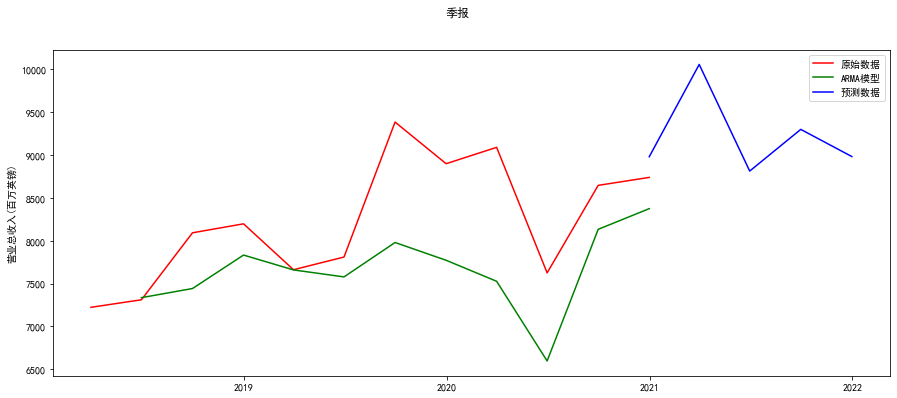

In [17]:
quarter.predict('2020-12-31', '2021-12-31', 1)

## 年报预测

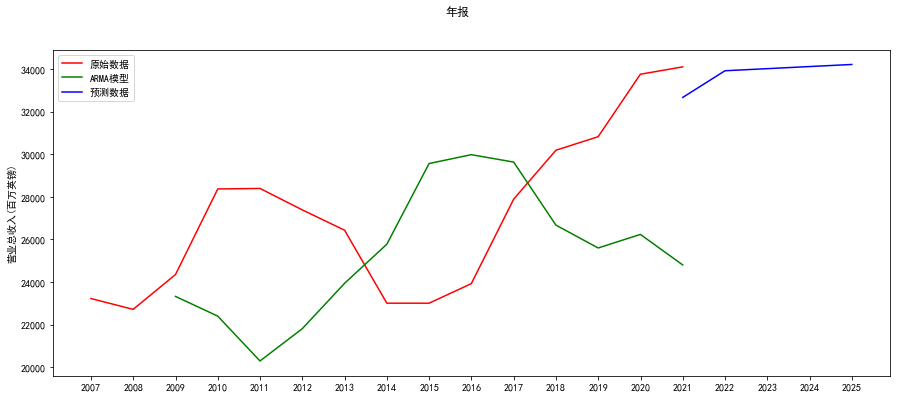

In [18]:
annum.predict('2020/12/31', '2024/12/31', 2)